# Applied Machine Learning: Module 3 (evaluation)

## Evaluation for classification

### Preamble

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_digits

dataset = load_digits()

X, y = dataset.data, dataset.target

for class_name, class_count in zip(dataset.target_names, np.bincount(dataset.target)):
    print(class_name, class_count)

0 178
1 182
2 177
3 183
4 181
5 182
6 181
7 179
8 174
9 180


In [2]:
# Creating a dataset with imbalanced binary classes
# Negatice class (0) is 'not digit 1'
# Positive class (1) is 'digit 1'

y_binary_imbalanced = y.copy()
y_binary_imbalanced[y_binary_imbalanced != 1] = 0

print('Original labels :\t', y[1:30])
print('New binary labels:\t', y_binary_imbalanced[1:30])

Original labels :	 [1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9]
New binary labels:	 [1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]


In [3]:
np.bincount(y_binary_imbalanced)

array([1615,  182])

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y_binary_imbalanced, random_state=0)

from sklearn.svm import SVC

clf = SVC(kernel='rbf', C=1)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.9088888888888889

### Dummy classifiers 

DummyClassifier is a classifier that make predictions using simple rules, which can be useful as a baseline for comparaison against actual classifiers especially with imbalanced classes 

In [5]:
from sklearn.dummy import DummyClassifier

# Negative class (0) is the most frequent
dummy_majority = DummyClassifier(strategy='most_frequent')
dummy_majority.fit(X_train, y_train)

y_dummy_prediction = dummy_majority.predict(X_train)
y_dummy_prediction

array([0, 0, 0, ..., 0, 0, 0])

In [6]:
dummy_majority.score(X_test, y_test)

0.9044444444444445

In [7]:
svm = SVC(kernel='linear', C=1)
svm.fit(X_train, y_train)
svm.score(X_test, y_test)

0.9777777777777777

### Confusion matrices

#### Binary (two-class) confusion matrix

In [8]:
from sklearn.metrics import confusion_matrix

# Negative class 0 is most frequent
dummy_majority = DummyClassifier(strategy='most_frequent').fit(X_train, y_train)
y_majority_predicted = dummy_majority.predict(X_test)
confusion = confusion_matrix(y_test, y_majority_predicted)

print('Most frequent class (dummy classifier)\n', confusion)

Most frequent class (dummy classifier)
 [[407   0]
 [ 43   0]]


In [9]:

dummy_classpro = DummyClassifier(strategy='stratified').fit(X_train, y_train)
y_classpro_predicted = dummy_classpro.predict(X_test)
confusion = confusion_matrix(y_test, y_classpro_predicted)

print('Random class-proportional prediction (dummy classifier)\n', confusion)

Random class-proportional prediction (dummy classifier)
 [[366  41]
 [ 38   5]]


In [10]:
svm = SVC(kernel='rbf', C=1).fit(X_train, y_train)
svm_prediction = svm.predict(X_test)
confusion = confusion_matrix(y_test, svm_prediction)

print('SVM prediciton (Linear kernel, C= 1)\n', confusion)

SVM prediciton (Linear kernel, C= 1)
 [[407   0]
 [ 41   2]]


In [11]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression().fit(X_train, y_train)
y_logistic_prediction = clf.predict(X_test)
confusion = confusion_matrix(y_test, y_logistic_prediction)

print('Logistic regression classifier (default settings)\n', confusion)

Logistic regression classifier (default settings)
 [[401   6]
 [  6  37]]


In [12]:
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier(max_depth=2).fit(X_train, y_train)
tree_predicitions = tree_clf.predict(X_test)
confusion = confusion_matrix(y_test, tree_predicitions)

print('Decision tree classifier (max_depth = 2)\n', confusion)

Decision tree classifier (max_depth = 2)
 [[400   7]
 [ 17  26]]


## Evaluation metrics for binary classification

In [13]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# Accuracy = (TP + TN) / (TP + FP + TN + FN)
# Precision = TP / (TP + FP)
# Recall = TP / (TP + FN)
# F1_score  = 2 * Precision * Recall / (Precision + Recall)

print('Accuracy: {:.2f}'.format(accuracy_score(y_test, tree_predicitions)))
print('Precision: {:.2f}'.format(precision_score(y_test, tree_predicitions)))
print('Recall: {:.2f}'.format(recall_score(y_test, tree_predicitions)))
print('F1_Score: {:.2f}'.format(f1_score(y_test, tree_predicitions)))

Accuracy: 0.95
Precision: 0.79
Recall: 0.60
F1_Score: 0.68


In [14]:
# Combined report with all above metrics
from sklearn.metrics import classification_report
print(classification_report(y_test, tree_predicitions, target_names=['not 1', '1']))

             precision    recall  f1-score   support

      not 1       0.96      0.98      0.97       407
          1       0.79      0.60      0.68        43

avg / total       0.94      0.95      0.94       450



In [15]:
print('Random class-proportional (dummy) \n',
     classification_report(y_test, y_classpro_predicted, target_names=['not 1', '1']))

print('SVM \n',
     classification_report(y_test, svm_prediction, target_names=['not 1', '1']))

print('Logistic Regression \n',
     classification_report(y_test, y_logistic_prediction, target_names=['not 1', '1']))

print('Decision tree \n',
     classification_report(y_test, tree_predicitions, target_names=['not 1', '1']))

Random class-proportional (dummy) 
              precision    recall  f1-score   support

      not 1       0.91      0.90      0.90       407
          1       0.11      0.12      0.11        43

avg / total       0.83      0.82      0.83       450

SVM 
              precision    recall  f1-score   support

      not 1       0.91      1.00      0.95       407
          1       1.00      0.05      0.09        43

avg / total       0.92      0.91      0.87       450

Logistic Regression 
              precision    recall  f1-score   support

      not 1       0.99      0.99      0.99       407
          1       0.86      0.86      0.86        43

avg / total       0.97      0.97      0.97       450

Decision tree 
              precision    recall  f1-score   support

      not 1       0.96      0.98      0.97       407
          1       0.79      0.60      0.68        43

avg / total       0.94      0.95      0.94       450



## Decision function

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y_binary_imbalanced, random_state=0)

lr_clf = LogisticRegression().fit(X_train, y_train)
y_scores_lr = lr_clf.decision_function(X_test)

y_score_list = list(zip(y_test[0:20], y_scores_lr[0:20]))
y_score_list

[(0, -23.172292973469546),
 (0, -13.542576515500063),
 (0, -21.717588760007867),
 (0, -18.90306513331644),
 (0, -19.733169947138638),
 (0, -9.746321749674767),
 (1, 5.2327155658831135),
 (0, -19.308012306288916),
 (0, -25.099330209728528),
 (0, -21.824312362996),
 (0, -24.14378275072049),
 (0, -19.578811099762508),
 (0, -22.5683713932802),
 (0, -10.822590225240777),
 (0, -11.907918741521932),
 (0, -10.977026853802803),
 (1, 11.206811164226373),
 (0, -27.64415761980748),
 (0, -12.857692102545409),
 (0, -25.8481491402402)]

In [17]:
y_proba_lr = lr_clf.predict_proba(X_test)
y_proba_list = list(zip(y_test[0:20], y_proba_lr[0:20, 1]))

y_proba_list

[(0, 8.637757922060678e-11),
 (0, 1.3138118599563783e-06),
 (0, 3.699738603909953e-10),
 (0, 6.1730972504865465e-09),
 (0, 2.6914925394345074e-09),
 (0, 5.850605777114361e-05),
 (1, 0.9946893464440469),
 (0, 4.1175302368500096e-09),
 (0, 1.257475089425303e-11),
 (0, 3.325229075466887e-10),
 (0, 3.2695529799373086e-11),
 (0, 3.1407283576084884e-09),
 (0, 1.580086411715015e-10),
 (0, 1.9943442430612578e-05),
 (0, 6.7368003023860014e-06),
 (0, 1.7089540581641637e-05),
 (1, 0.9999864188091131),
 (0, 9.869494034019548e-13),
 (0, 2.6059983600823893e-06),
 (0, 5.9469113009063784e-12)]

# Precision recall curve

/home/djaballah/PythonEnv/PFE/lib/python3.5/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


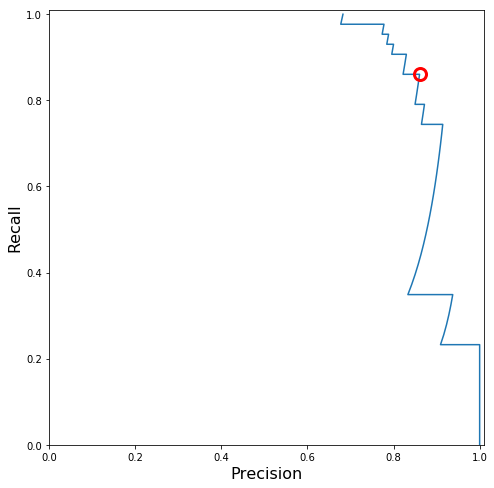

In [18]:
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(y_test, y_scores_lr)
closest_zero = np.argmin(np.abs(thresholds))
closest_zero_p = precision[closest_zero]
closest_zero_r = recall[closest_zero]

plt.figure(figsize=(14, 8))
plt.xlim([0.0, 1.01])
plt.ylim([0.0, 1.01])
plt.plot(precision, recall, label='Precision-recall-curve')
plt.plot(closest_zero_p, closest_zero_r, 'o', markersize=12, fillstyle='none', c='r', mew=3)
plt.xlabel('Precision', fontsize=16)
plt.ylabel('Recall', fontsize=16)
plt.axes().set_aspect('equal')
plt.show()


/home/djaballah/PythonEnv/PFE/lib/python3.5/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


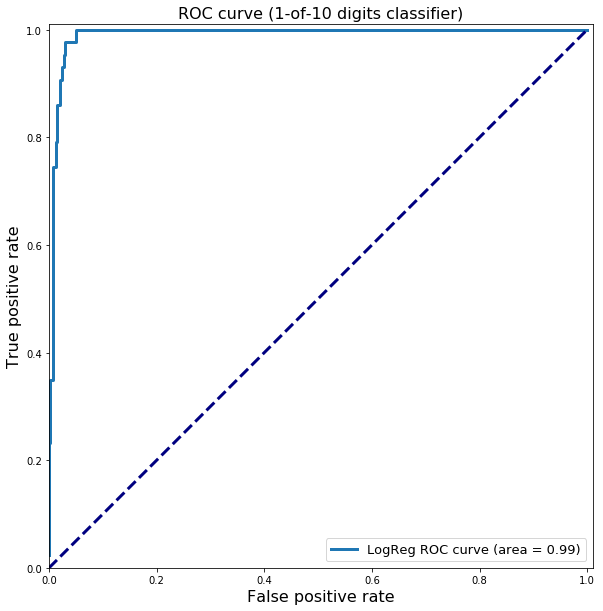

In [19]:
from sklearn.metrics import roc_curve, auc

y_score_lr = lr_clf.decision_function(X_test)
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_score_lr)
roc_auc_lr = auc(fpr_lr, tpr_lr)

plt.figure(figsize=(10, 10))
plt.xlim([0.0, 1.01])
plt.ylim([0.0, 1.01])
plt.plot(fpr_lr, tpr_lr, lw=3, label='LogReg ROC curve (area = {:.2f})'.format(roc_auc_lr))
plt.xlabel('False positive rate', fontsize=16)
plt.ylabel('True positive rate', fontsize=16)
plt.title('ROC curve (1-of-10 digits classifier)', fontsize=16)
plt.legend(loc='lower right', fontsize=13)
plt.plot([0, 1], [0, 1], color='navy', lw=3, linestyle='--')
plt.axes().set_aspect('equal')

gamma = 0.01  accuracy = 0.91   AUC = 1.00
gamma = 0.10  accuracy = 0.90   AUC = 0.98
gamma = 0.20  accuracy = 0.90   AUC = 0.66
gamma = 1.00  accuracy = 0.90   AUC = 0.50


/home/djaballah/PythonEnv/PFE/lib/python3.5/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


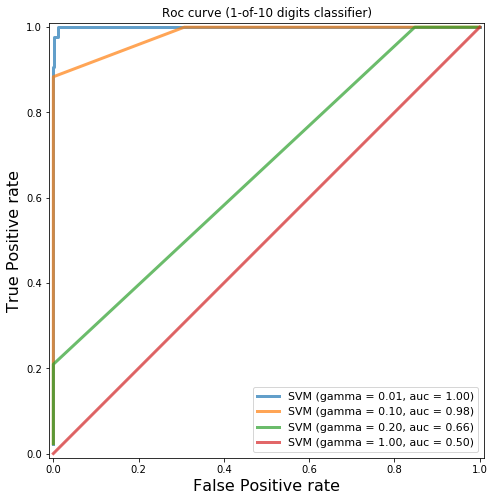

In [20]:
from matplotlib import cm

plt.figure(figsize=(8, 8))
plt.xlim([-0.01, 1.01])
plt.ylim([-0.01, 1.01])

for g in [0.01, 0.1, 0.2, 1]:
    svm = SVC(gamma=g)
    svm.fit(X_train, y_train)
    y_score_svm = svm.decision_function(X_test)
    fpr, tpr, _ = roc_curve(y_test, y_score_svm)
    auc_svm = auc(fpr, tpr)
    accuracy_svm = svm.score(X_test, y_test)
    print("gamma = {:.2f}  accuracy = {:.2f}   AUC = {:.2f}".format(g, accuracy_svm, 
                                                                    auc_svm))
    plt.plot(fpr, tpr, lw=3, alpha=.7, 
             label = 'SVM (gamma = {:.2f}, auc = {:.2f})'.format(g, auc_svm))

plt.xlabel('False Positive rate', fontsize=16)
plt.ylabel('True Positive rate', fontsize=16)
plt.plot([0, 1], [0, 1], color='k', lw=0.05, linestyle='--')
plt.legend(loc='lower right', fontsize=11)
plt.title('Roc curve (1-of-10 digits classifier)')
plt.axes().set_aspect('equal')

### Evaluations measures for multi-class classification

#### Multi-class confusion matrix

Text(0.5,15,'Predicted label')

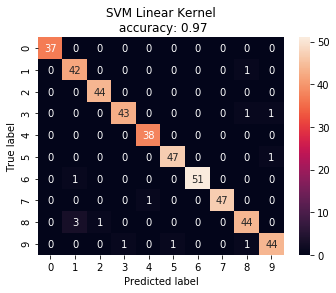

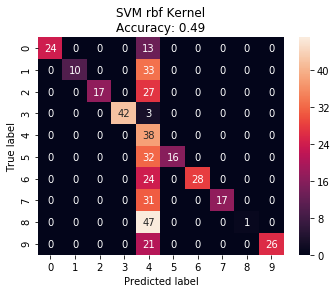

In [24]:
from sklearn.metrics import confusion_matrix

dataset = load_digits()
X, y = dataset.data, dataset.target

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

svm = SVC(kernel='linear')
svm.fit(X_train, y_train)

svm_prediction = svm.predict(X_test)
confusion_mc = confusion_matrix(y_test, svm_prediction)

df_confusion = pd.DataFrame(confusion_mc,
                            index=[i for i in range(0, 10)], columns=[i for i in range(0, 10)])

plt.figure(figsize=(5.5, 4))
sns.heatmap(df_confusion, annot=True)
plt.title('SVM Linear Kernel\n accuracy: {:.2f}'.format(accuracy_score(y_test, svm_prediction)))
plt.ylabel('True label')
plt.xlabel('Predicted label')

svm = SVC(kernel='rbf')
svm.fit(X_train, y_train)
svm_prediction = svm.predict(X_test)
confusion_mc = confusion_matrix(y_test, svm_prediction)
df_confusion = pd.DataFrame(confusion_mc,
                            index=[i for i in range(0, 10)], columns=list(range(0, 10)))

plt.figure(figsize=(5.5, 4))
sns.heatmap(df_confusion, annot=True)
plt.title('SVM rbf Kernel\nAccuracy: {:.2f}'.format(accuracy_score(y_test, svm_prediction)))
plt.ylabel('True label')
plt.xlabel('Predicted label')


### Multi-classification report

In [23]:
print(classification_report(y_test, svm_prediction))

             precision    recall  f1-score   support

          0       1.00      0.65      0.79        37
          1       1.00      0.23      0.38        43
          2       1.00      0.39      0.56        44
          3       1.00      0.93      0.97        45
          4       0.14      1.00      0.25        38
          5       1.00      0.33      0.50        48
          6       1.00      0.54      0.70        52
          7       1.00      0.35      0.52        48
          8       1.00      0.02      0.04        48
          9       1.00      0.55      0.71        47

avg / total       0.93      0.49      0.54       450



### Micro- vs Macro-averaged metrics

In [26]:
print('Micro-averaged precision = {:.2f} (treat instances equally)'.
     format(precision_score(y_test, svm_prediction, average='micro')))

print('Macro-averaged precision = {:.2f} (treat classes equally)'.
     format(precision_score(y_test, svm_prediction, average='macro')))

Micro-avereged precision = 0.49 (treat instances equally)
Macro-avereged precision = 0.91 (treat classes equally)


In [27]:
print('Micro-averaged f1 = {:.2f}'.
     format(f1_score(y_test, svm_prediction, average='micro')))

print('Macro-averaged f1 = {:.2f}'.
     format(f1_score(y_test, svm_prediction, average='macro')))

Micro-averaged f1 = 0.49
Macro-averaged f1 = 0.54
